In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wx_programs as wx
import bnc
from generator import *
from hardware_config import *
from values import *
from qubit_class import *
import standard_sequences.pinopi as pnp
import daq.daq_programs_homo as daq
from analysis.analysis import *



In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(qubit_id=q1, ef_amp=1, ro_freq=6.7275, ROq3=6.583064, RO_LO=6.6247, ro_amp=0.6, ge_amp=1.2, IQ_angle=205, ef_time=76.33212714344363, RO_LO_pwr=16, ef_ssm=-0.255, ge_time=51.07894601677215, ge_ssm=-0.11, ROIF=0.10280000000000022, qubit_thr=[-10000, -600], ro_dur=4000)
Qubit(qubit_id=q2, ef_amp=1, ro_freq=6.65555, ROq3=6.583064, RO_LO=6.6247, ro_amp=0.4, ge_amp=1.2, IQ_angle=85, ef_time=None, RO_LO_pwr=16, ef_ssm=-0.224, ge_time=40.15374412400174, ge_ssm=-0.152, ROIF=0.030850000000000044, qubit_thr=[-10000, 2500], ro_dur=4000)


In [9]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
num_steps = 3
reps = 100000
sweep_time = 500
swap_freq=-.021
swap_time=213.58765318403013

writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 32.408896 sec
Captured 98 buffers (3.023861 buffers per sec)
Captured 301056 records (9289.301385 records per sec)
Transferred 4932501504 bytes (152195913.891819 bytes per sec)


<Figure size 800x800 with 0 Axes>

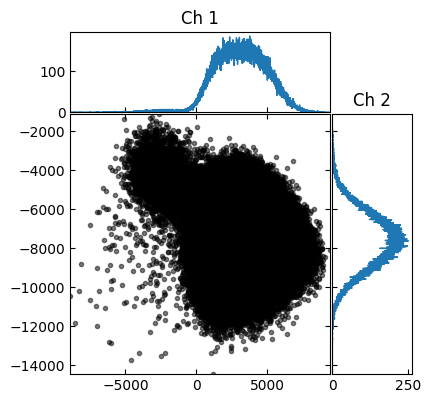

<Figure size 800x800 with 0 Axes>

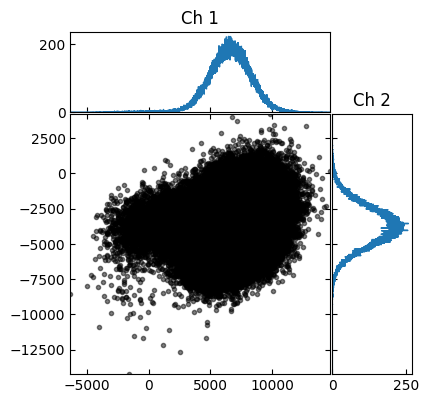

saved G
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 33.180830 sec
Captured 98 buffers (2.953513 buffers per sec)
Captured 301056 records (9073.190755 records per sec)
Transferred 4932501504 bytes (148655157.322098 bytes per sec)


<Figure size 800x800 with 0 Axes>

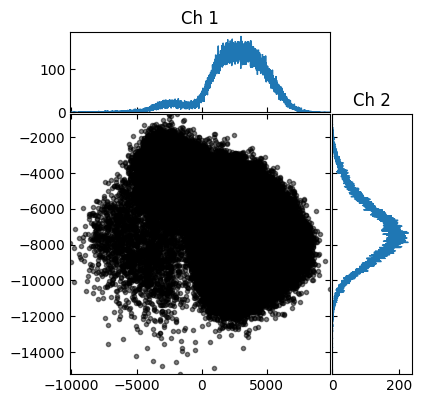

<Figure size 800x800 with 0 Axes>

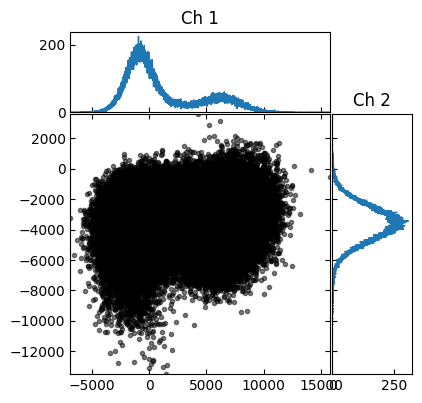

saved E
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 100000
Buffers per acquistion: 98
DAQ samples per pattern: 8192
0, No error
Capturing 98 buffers. Press <enter> to abort
Capture completed in 34.098953 sec
Captured 98 buffers (2.873988 buffers per sec)
Captured 301056 records (8828.892656 records per sec)
Transferred 4932501504 bytes (144652577.273349 bytes per sec)


<Figure size 800x800 with 0 Axes>

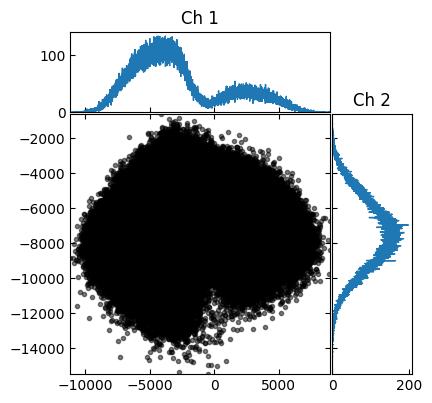

<Figure size 800x800 with 0 Axes>

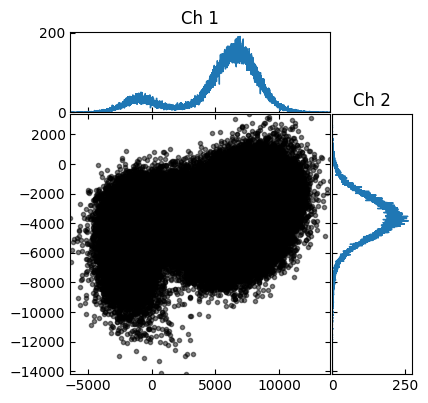

saved F


In [12]:
for i in range(3):
    if 0 == i:
        label = 'G'
        pnp.pi_nopi_swap(q1, q2, general_vals_dict, copief = 0, coswap = 1,copige = 0,num_steps = 3,swap_freq =  swap_freq, swap_time = swap_time)
    elif 1 == i:
        label = 'E'
        # E prep
        pnp.pi_nopi_swap(q1, q2, general_vals_dict, copief = 0, coswap = 1,copige = 1,num_steps = 3,swap_freq =  swap_freq, swap_time = swap_time)
    elif 2 == i:
        label = 'F'
        # F prep
        pnp.pi_nopi_swap(q1, q2, general_vals_dict, copief = 1, coswap = 1,copige = 1,num_steps = 3,swap_freq =  swap_freq, swap_time = swap_time)

    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    values = daq.run_daq_het_2q(q1, q2,
                    num_patterns=num_steps, num_records_per_pattern=reps,
                        verbose=True)

    # Retrieve raw IQ data from the acquired values
    I1_raw = values.rec_readout_1[0][0:reps*num_steps]
    Q1_raw = values.rec_readout_1[1][0:reps*num_steps]
    I2_raw = values.rec_readout_2[0][0:reps*num_steps]
    Q2_raw = values.rec_readout_2[1][0:reps*num_steps]

    # Build a DataFrame from the IQ data for classification
    IQ_df = pd.DataFrame({
        "I1": I1_raw,
        "Q1": Q1_raw,
        "I2": I2_raw,
        "Q2": Q2_raw
    })

    IQ_df.to_csv(f'IQraw{label}.csv')
    print(f"saved {label}")